# Kmeans算法实现

In [1]:
import numpy as np

In [2]:
#计算两点间的距离
def distance(a, b):
    return ((a[0] - b[0]) ** 2 + (a[1] - b[1]) ** 2) ** 0.5

In [3]:
#计算中心
def means(a):
    return np.array([np.mean([i[0] for i in a]), np.mean([i[1] for i in a])])

In [4]:
# arr距离a最远的元素，用于初始化聚类中心
def farthest(k_arr, arr): #arr：全部散点；k_arr：其中m个作为中心的散点
    f = [0, 0]
    max_d = 0
    for e in arr:
        d = 0
        for i in range(len(k_arr)):
            d += (distance(k_arr[i], e)) ** 0.5
        if d > max_d:
            max_d = d
            f = e
    return f

In [72]:
#随机生成二维散点数据
np.random.seed(555)
arr = np.random.randint(1000, size=(80, 1, 2))[:, 0, :]
arr[:10]

array([[410, 686],
       [ 33, 580],
       [381, 550],
       [406, 233],
       [496, 309],
       [608,  84],
       [918, 598],
       [949, 586],
       [469,  27],
       [476,  58]])

In [73]:
## 初始化聚类中心和聚类容器
m = 4 #要聚的类的数量
r = np.random.randint(len(arr) - 1)
k_arr = np.array([arr[r]])
cla_arr = [[]]
for i in range(m - 1):
    k = farthest(k_arr, arr)
    k_arr = np.concatenate([k_arr, np.array([k])])
    cla_arr.append([])


In [74]:
## 迭代聚类
n = 50
cla_temp = cla_arr
for i in range(n):    # 迭代n次
    for e in arr:    # 把集合里每一个元素聚到最近的类
        ki = 0        # 假定距离第一个中心最近
        min_d = distance(e, k_arr[ki])
        for j in range(1, len(k_arr)):
            if distance(e, k_arr[j]) < min_d:    # 找到更近的聚类中心
                min_d = distance(e, k_arr[j])
                ki = j
        cla_temp[ki].append(e)
    # 迭代更新聚类中心
    for k in range(len(k_arr)):
        if n - 1 == i:
            break
        k_arr[k] = means(cla_temp[k])
        cla_temp[k] = []

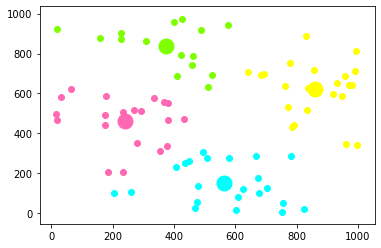

In [75]:
import matplotlib.pyplot as plt
col = ['HotPink', 'Aqua', 'Chartreuse', 'yellow']
for i in range(m):
    plt.scatter(k_arr[i][0], k_arr[i][1], linewidth=10, color=col[i])
    plt.scatter([e[0] for e in cla_temp[i]], [e[1] for e in cla_temp[i]], color=col[i])
plt.show()